# Script File for Final Online Assessment (FOA) submission
## BACS3013 Data Science

### 2021/2022  October Examination

It is an open-book e-assessment. You are allowed to refer to any practical notes/use cases/GitHub/Stack Overflow etc. Anyhow, you **MUST NOT** receive any help whatsoever from any other person. If you need any clarification, please directly ask the lecturer(s)-in-charge.

## Please insert your details below:
    
1) Double click the cell below


2) Type your name and student id


3) press CTRL + Enter

# Name: Liew Chun Kin
# Student ID: 21WMR04786
# Programme: RDS2

# Step 1: Put the last three digits of your student id as the my_state_number

eg: if your id is 1902589

You should then write


my_state_number = 589

In [1]:
# replace 589 with the last three digits of your student id
# and then press CTRL + Enter
my_state_number = 786

# Step 2: Read the foa_dataset.csv

In [2]:
import pandas as pd
data = pd.read_csv("foa_dataset.csv")

data.head()

,names,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,role,salary,class
0,Jessica Stroud,0.38,0.53,2,157,3,0,0,sales,low,1
1,Daryl Fields,0.80,0.86,5,262,6,0,0,sales,medium,1
2,Daisy Anderson,0.11,0.88,7,272,4,0,0,sales,medium,1
3,Joseph Fernandez,0.72,0.87,5,223,5,0,0,sales,low,1
4,Herbert Moore,0.37,0.52,2,159,3,0,0,sales,low,1


# Step 3: Sample the data randomly the data and save the dataframe as myNewData

In [3]:
myNewData = data.sample(frac =.90, replace = False, random_state = my_state_number)
myNewData.head()

,names,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,role,salary,class
7686,Melissa Thompson,0.67,0.92,4,156,2,0,0,support,medium,0
8988,Beverly Valencia,0.96,0.93,3,238,2,0,0,technical,low,0
5850,George Graham,0.83,0.75,3,150,3,0,0,support,low,0
10600,Matthew Stuart,0.63,0.94,4,219,3,0,0,product_mng,low,0
6207,Jennifer White,0.63,0.98,4,210,3,0,0,sales,medium,0


# Step 4: Start the Analytics using **myNewData** dataframe as the raw data
Note: Your *myNewData* dataframe may be different from other students' *myNewData* dataframe

# Business Understanding

This dataset was downloaded from a Kaggle page. A human resources company wants to design an
artificial intelligence model to predict employee attrition and is particularly interested to know the common factors or features affecting the employee leaving the company. A total number of 10 features
have been selected. The company wants to have a complete solution that always gives high accuracy.

# Data Understanding

The dataset contains 10 feature columns with indices 0-9 giving the information about various
attributes that were collected from the employee. The last columns is the target variable (class) where 1 means the employee left the company while 0 means the employee stayed at the company

In [4]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import missingno as msno
from datetime import date
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
#pip install --user scikit-learn

#### Check unique data in each column

In [5]:
print(myNewData['names'].unique())
print(myNewData['satisfaction_level'].unique())
print(myNewData['last_evaluation'].unique())
print(myNewData['number_project'].unique())
print(myNewData['average_montly_hours'].unique())
print(myNewData['time_spend_company'].unique())
print(myNewData['Work_accident'].unique())
print(myNewData['promotion_last_5years'].unique())
print(myNewData['role'].unique())
print(myNewData['salary'].unique())
print(myNewData['class'].unique())

['Melissa Thompson' 'Beverly Valencia' 'George Graham' ... 'Robert Morgan'
 'Evan Dennard' 'Kassandra Noe']
[0.67 0.96 0.83 0.63 0.65 0.95 0.77 0.09 0.89 0.74 0.66 0.86 0.82 0.42
 0.87 0.72 0.43 0.68 0.76 0.1  0.91 0.92 0.97 0.84 0.99 0.5  0.55 0.19
 0.85 0.56 0.79 0.94 0.78 0.8  0.93 0.62 0.59 0.71 0.31 0.51 0.58 0.98
 0.57 0.61 0.64 0.49 0.6  0.36 0.45 0.39 0.41 0.47 0.37 0.54 0.81 0.4
 0.75 0.11 0.9  0.23 0.7  0.14 0.38 0.16 0.13 0.34 0.29 0.44 0.73 0.46
 0.52 0.22 0.18 0.48 0.53 0.88 0.35 0.69 0.15 1.   0.2  0.24 0.26 0.33
 0.21 0.25 0.12 0.3  0.27 0.32 0.28 0.17]
[0.92 0.93 0.75 0.94 0.98 0.99 0.48 0.9  0.96 0.57 0.59 0.63 0.88 0.52
 0.72 0.91 0.5  0.55 0.73 0.82 0.77 1.   0.58 0.64 0.41 0.49 0.83 0.68
 0.84 0.6  0.51 0.8  0.76 0.87 0.95 0.97 0.47 0.44 0.4  0.74 0.66 0.62
 0.61 0.85 0.69 0.53 0.67 0.79 0.65 0.86 0.81 0.89 0.43 0.56 0.71 0.45
 0.7  0.78 0.54 0.42 0.39 0.46 0.38 0.37 0.36]
[4 3 5 6 2 7]
[156 238 150 219 210 240 225 170 256 233 278 215 232 199 151 154 267 164
 129 19

In [6]:
myNewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13499 entries, 7686 to 7952
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  13499 non-null  object 
 1   satisfaction_level     13499 non-null  float64
 2   last_evaluation        13499 non-null  float64
 3   number_project         13499 non-null  int64  
 4   average_montly_hours   13499 non-null  int64  
 5   time_spend_company     13499 non-null  int64  
 6   Work_accident          13499 non-null  int64  
 7   promotion_last_5years  13499 non-null  int64  
 8   role                   13499 non-null  object 
 9   salary                 13499 non-null  object 
 10  class                  13499 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.2+ MB


In [7]:
myNewData.shape

(13499, 11)

In [8]:
myNewData.corr(method ='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,class
satisfaction_level,1.000000,0.109796,-0.136181,-0.015530,-0.102898,0.056676,0.024728,-0.385582
last_evaluation,0.109796,1.000000,0.344765,0.338404,0.128411,-0.009596,-0.006967,0.003780
number_project,-0.136181,0.344765,1.000000,0.410330,0.195202,-0.005259,-0.002820,0.019043
average_montly_hours,-0.015530,0.338404,0.410330,1.000000,0.123727,-0.007930,-0.003389,0.068737
time_spend_company,-0.102898,0.128411,0.195202,0.123727,1.000000,0.005681,0.072503,0.144178
Work_accident,0.056676,-0.009596,-0.005259,-0.007930,0.005681,1.000000,0.037128,-0.153376
promotion_last_5years,0.024728,-0.006967,-0.002820,-0.003389,0.072503,0.037128,1.000000,-0.065373
class,-0.385582,0.003780,0.019043,0.068737,0.144178,-0.153376,-0.065373,1.000000


From the table above, it is clear that all points are having  a strong  positive correlation to 
each other.

In [9]:
myNewData.dtypes

names                     object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
role                      object
salary                    object
class                      int64
dtype: object

In [10]:
myNewData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,class
count,13499.000000,13499.000000,13499.000000,13499.000000,13499.000000,13499.000000,13499.000000,13499.000000
mean,0.614789,0.716855,3.803541,201.095785,3.499667,0.145640,0.021928,0.236092
std,0.247993,0.171309,1.228550,49.906096,1.465885,0.352758,0.146452,0.424695
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



From the table above, it is clearly shown that the count, mean, standard deviation, minimum, first 
quartile, median, third quartile and maximum values for each feature.

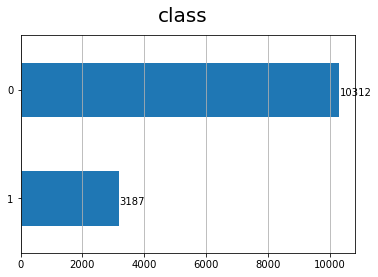

In [11]:
y = "class"
ax = myNewData[y].value_counts().sort_values().plot(kind="barh") 
totals= []
for i in ax.patches: 
    totals.append(i.get_width())
total = sum(totals) 
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20, 
    str(round(i.get_width())),
    fontsize=10, color='black') 
ax.grid(axis="x") 
plt.suptitle(y, fontsize=20) 
plt.show()

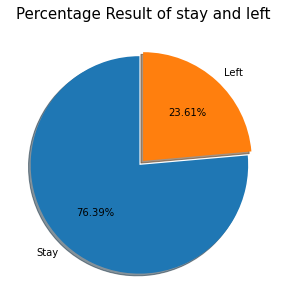

In [118]:
# Print Pie Chart
plt.figure(figsize=(5,5))
stay = len(myNewData[myNewData['class'] == 0])
left = len(myNewData[myNewData['class'] == 1])
plt.title("Percentage Result of stay and left",fontsize = 15)
plt.pie(x=[stay, left], explode=[0.05, 0], labels=['Stay', 'Left'], autopct='%1.2f%%', shadow=True,startangle = 90)
plt.show()

#'target' refers to the dependent variable (y)

Above bar plot is appropriate  to understand  labels frequency for a single categorical variable. 
Up to 13499 rows, the stay rate is 1 10312(76.39%) compare to left rate
is 3187(23.61%).

# Data Preprocessing
- Cleaning the data
- Label Encoder
- Standardizing the data
- Normalization

In [12]:
#identify missing value
myNewData.isnull().sum()

names                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
role                     0
salary                   0
class                    0
dtype: int64

We can see here that there is no missing value in the dataset, double check again with heatmap.

<AxesSubplot:>

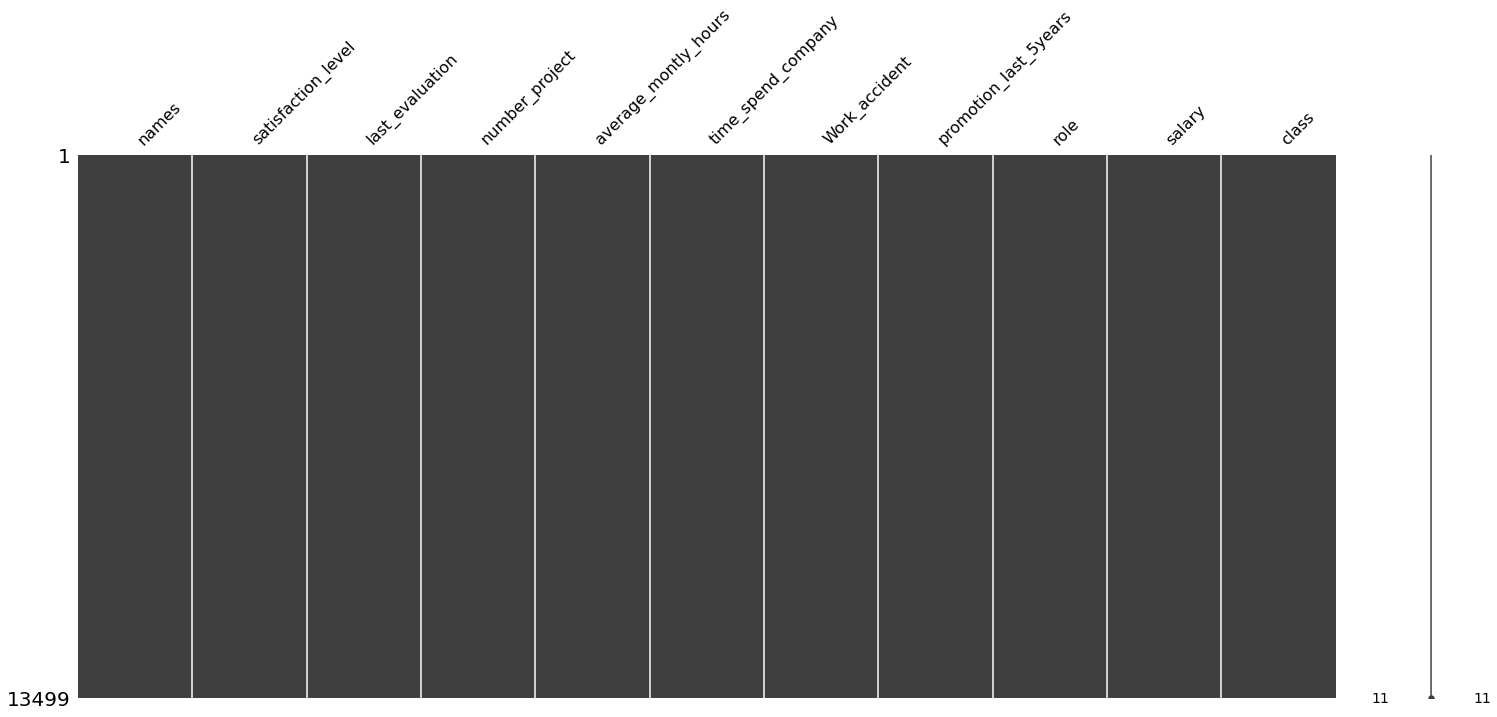

In [13]:
msno.matrix(myNewData)

A missingno provides a small set of tools that contains flexible and easy-to-use missing data visualization and utilities, allowing you to quickly and intuitively understand the integrity of the dataset. In this data set, no missing values.

## Target label coding

The column "role" and "salary" that is our goal is currently in the classified text. To convert categorical values ​​to numeric values, we use a label encoder because it is designed specifically for the purpose. low is set to 0, medium is set to 1, high is set to 2. In general, the purpose of tagging the target is to ensure that the modeling algorithm performs better in testing and prediction.

In [14]:
myNewData['salary'].astype('category')

7686     medium
8988        low
5850        low
10600       low
6207     medium
          ...  
1395     medium
3273     medium
4475     medium
11969       low
7952     medium
Name: salary, Length: 13499, dtype: category
Categories (3, object): ['high', 'low', 'medium']

In [15]:
myNewData.dtypes

names                     object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
role                      object
salary                    object
class                      int64
dtype: object

In [16]:
le = LabelEncoder()
myNewData['salary'] = le.fit_transform(myNewData['salary'])
myNewData['salary'].unique()

array([2, 1, 0])

## Detect outliers

Outliers are the upper and lower extreme values ​​that are abnormally different from the rest of the data set. If you don't remove outliers, they destroy precision because some models (such as Logistic Regression and K-Nearest Neighbors) are very sensitive to outliers. Box plots are useful because they show outliers in the data set. Outliers are observations that have a value very far from the rest of the data. When viewing the box plot, outliers are defined as data points that lie outside the box plot whiskers.

Before remove outliers:

<AxesSubplot:>

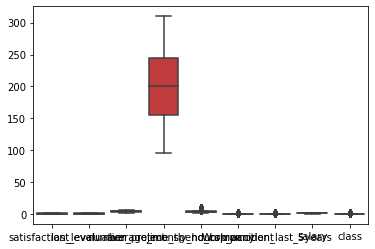

In [17]:
sns.boxplot(data=myNewData)

We can see that there are no outliers.

## Define feature and target

This step is to prepare the dataset for the modeling and train test split.
- Feature for this data is all feature except the 'names' column because this did not bring much info to the model and the target is Class

In [22]:
X = myNewData.drop(['class', 'names', 'role'],axis=1)

y = myNewData['class']

In [23]:
print("Feature\n",X)
print("Target\n",y)

Feature
        satisfaction_level  last_evaluation  number_project  \
7686                 0.67             0.92               4   
8988                 0.96             0.93               3   
5850                 0.83             0.75               3   
10600                0.63             0.94               4   
6207                 0.63             0.98               4   
...                   ...              ...             ...   
1395                 0.45             0.51               2   
3273                 0.49             0.52               5   
4475                 0.67             0.52               4   
11969                0.60             0.85               3   
7952                 0.41             0.56               2   

       average_montly_hours  time_spend_company  Work_accident  \
7686                    156                   2              0   
8988                    238                   2              0   
5850                    150                   3 

In [24]:
#Train Test Split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state= 50)

Train test split are implemented  for estimating  the performance of machine learning  algorithms. 
Then, the ratio for the train data and test data that used for all models will be 80:20.

In [28]:
metrics=pd.DataFrame(index=['accuracy','precision', 'recall'],
             columns=['NULL','KNN','LogisticReg','RandForest','NaiveBayes'])
metrics

,NULL,KNN,LogisticReg,RandForest,NaiveBayes
accuracy,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN


## Standardizing the data 

Standardization helps to scale down the features based on standard normal distribution.The standardized values are 0-1 because the mean is usually 0 and standard deviation is usually 1.

In [140]:
#Train test split
scaler = StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=2)
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [32]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_standardized,y_train)

y_pred_test=neigh.predict(X_test_standardized)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test,y_true=y_test)
print("After standardization:\n\n",classification_report(y_test,y_pred_test))
standard =classification_report(y_test,y_pred_test)

After standardization:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2053
           1       0.92      0.90      0.91       647

    accuracy                           0.96      2700
   macro avg       0.94      0.94      0.94      2700
weighted avg       0.96      0.96      0.96      2700



## Normalization

Normalization helps to scale down the features between 0-1.

In [33]:
#Train test split
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(X_train_scaled,y_train)

y_pred_test=neigh.predict(X_test_scaled)
metrics.loc['accuracy', 'KNN'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision', 'KNN'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall', 'KNN'] = recall_score(y_pred=y_pred_test,y_true=y_test)
print("After normalization:\n\n",classification_report(y_test,y_pred_test))
standard =classification_report(y_test,y_pred_test)

After normalization:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2053
           1       0.92      0.90      0.91       647

    accuracy                           0.96      2700
   macro avg       0.95      0.94      0.94      2700
weighted avg       0.96      0.96      0.96      2700



By referring to the two images shown above after Standardizing and Normalizing, it is seen that both results are totally the same for precision, recall, f1-score and support. Therefore, it can be concluded that the features in the dataset are well-defined to be used whether by standardizing or normalizing.

In [37]:
myNewData['role'].astype('category')

7686         support
8988       technical
5850         support
10600    product_mng
6207           sales
            ...     
1395           sales
3273     product_mng
4475         support
11969             IT
7952           sales
Name: role, Length: 13499, dtype: category
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales', 'support', 'technical']

In [38]:
myNewData.dtypes

names                     object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
role                      object
salary                     int32
class                      int64
dtype: object

In [40]:
myNewData

,names,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,role,salary,class
7686,Melissa Thompson,0.67,0.92,4,156,2,0,0,support,2,0
8988,Beverly Valencia,0.96,0.93,3,238,2,0,0,technical,1,0
5850,George Graham,0.83,0.75,3,150,3,0,0,support,1,0
10600,Matthew Stuart,0.63,0.94,4,219,3,0,0,product_mng,1,0
6207,Jennifer White,0.63,0.98,4,210,3,0,0,sales,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1395,Yvette Lively,0.45,0.51,2,156,3,0,0,sales,2,1
3273,Maria Scott,0.49,0.52,5,188,4,0,0,product_mng,2,0
4475,Robert Morgan,0.67,0.52,4,262,2,0,0,support,2,0
11969,Evan Dennard,0.60,0.85,3,242,2,0,0,IT,1,0


In [43]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(myNewData[['role']]).toarray())
# merge with main df bridge_df on key values
df_encoded = X.join(enc_df)
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
7686,0.67,0.92,4,156,2,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8988,0.96,0.93,3,238,2,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5850,0.83,0.75,3,150,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10600,0.63,0.94,4,219,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6207,0.63,0.98,4,210,3,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.45,0.51,2,156,3,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,0.49,0.52,5,188,4,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4475,0.67,0.52,4,262,2,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11969,0.60,0.85,3,242,2,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Modelling 

In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain, Ytrain)
y_knn = knn.predict(Xtest)

print('\n\t\tK-Nearest Neighbors Classifier\n\n', classification_report(Ytest, y_knn, digits=4))


		K-Nearest Neighbors Classifier

               precision    recall  f1-score   support

           0     0.9696    0.9724    0.9710      2063
           1     0.9097    0.9011    0.9054       637

    accuracy                         0.9556      2700
   macro avg     0.9396    0.9367    0.9382      2700
weighted avg     0.9554    0.9556    0.9555      2700



In [45]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
y_gnb = gnb.predict(Xtest)

print('\n\t\tGaussian Naive Bayes Classifier\n\n', classification_report(Ytest, y_gnb, digits=4))


		Gaussian Naive Bayes Classifier

               precision    recall  f1-score   support

           0     0.9099    0.8080    0.8560      2063
           1     0.5438    0.7410    0.6272       637

    accuracy                         0.7922      2700
   macro avg     0.7269    0.7745    0.7416      2700
weighted avg     0.8235    0.7922    0.8020      2700



In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
y_lr = lr.predict(Xtest)

print('\n\t\tLogistic Regression\n\n', classification_report(Ytest, y_lr, digits=4))


		Logistic Regression

               precision    recall  f1-score   support

           0     0.8008    0.9292    0.8602      2063
           1     0.5229    0.2512    0.3393       637

    accuracy                         0.7693      2700
   macro avg     0.6618    0.5902    0.5998      2700
weighted avg     0.7352    0.7693    0.7373      2700



In [47]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=67)
rf.fit(Xtrain, Ytrain)
y_rf = rf.predict(Xtest)

print('\n\t\tRandom Forest Classifier\n\n', classification_report(Ytest, y_rf, digits=4))


		Random Forest Classifier

               precision    recall  f1-score   support

           0     0.9856    0.9956    0.9906      2063
           1     0.9854    0.9529    0.9689       637

    accuracy                         0.9856      2700
   macro avg     0.9855    0.9743    0.9797      2700
weighted avg     0.9856    0.9856    0.9855      2700



In [48]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Xtrain, Ytrain)
y_dt = dt.predict(Xtest)

print('\n\t\tDecission tree Classifier\n\n', classification_report(Ytest, y_dt, digits=4))


		Decission tree Classifier

               precision    recall  f1-score   support

           0     0.9731    0.9651    0.9691      2063
           1     0.8899    0.9137    0.9016       637

    accuracy                         0.9530      2700
   macro avg     0.9315    0.9394    0.9354      2700
weighted avg     0.9535    0.9530    0.9532      2700



In [49]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)
y_lda = lda.predict(Xtest)

print('\n\t\tLinear Discriminant Analysis\n\n', classification_report(Ytest, y_lda,digits=4 ))


		Linear Discriminant Analysis

               precision    recall  f1-score   support

           0     0.8012    0.9200    0.8565      2063
           1     0.5015    0.2606    0.3430       637

    accuracy                         0.7644      2700
   macro avg     0.6513    0.5903    0.5997      2700
weighted avg     0.7305    0.7644    0.7353      2700



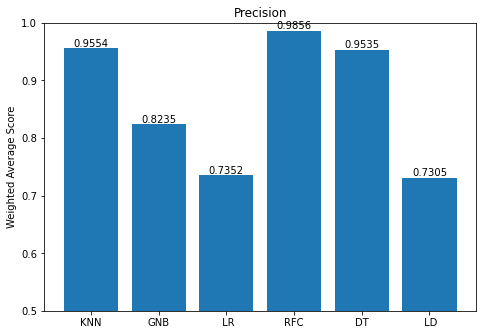

In [141]:
# Precision
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9554,0.8235,0.7352,0.9856,0.9535,0.7305]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Precision')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest precision, Linear Discriminant gives the lowest.

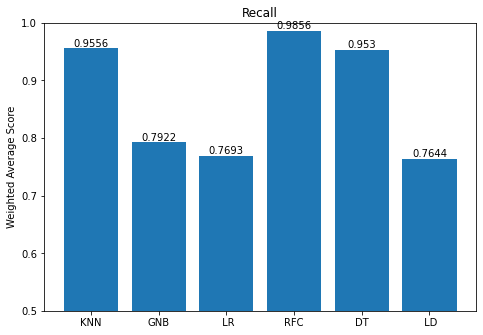

In [142]:
# Recall
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9556,0.7922,0.7693,0.9856,0.9530,0.7644]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Recall')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest recall, Linear Discriminant gives the lowest.

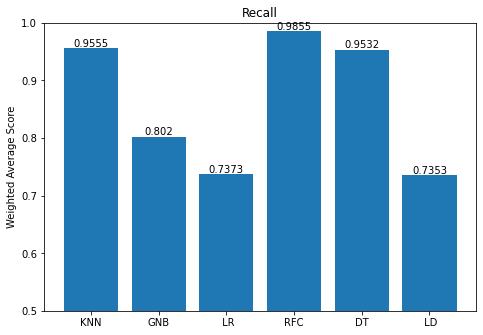

In [139]:
# F1-score
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9555,0.8020,0.7373,0.9855,0.9532,0.7353]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Recall')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest recall, Linear Discriminant gives the lowest.

# Modelling with one-hot encoder

In [63]:
df_encoded.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                     int32
0                        float64
1                        float64
2                        float64
3                        float64
4                        float64
5                        float64
6                        float64
7                        float64
8                        float64
9                        float64
dtype: object

In [64]:
#identify missing value
df_encoded.isnull().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company          0
Work_accident               0
promotion_last_5years       0
salary                      0
0                        1341
1                        1341
2                        1341
3                        1341
4                        1341
5                        1341
6                        1341
7                        1341
8                        1341
9                        1341
dtype: int64

In [67]:
fill_wif_zero = df_encoded.fillna(0)

In [69]:
#identify missing value
fill_wif_zero.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
dtype: int64

In [70]:
## Train test-split using df_encoded which fill with 0
Xtrain, Xtest, Ytrain, Ytest = train_test_split(fill_wif_zero, y, test_size=0.2, random_state= 50)

In [71]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain, Ytrain)
y_knn = knn.predict(Xtest)

print('\n\t\tK-Nearest Neighbors Classifier\n\n', classification_report(Ytest, y_knn, digits=4))


		K-Nearest Neighbors Classifier

               precision    recall  f1-score   support

           0     0.9740    0.9428    0.9581      2063
           1     0.8321    0.9184    0.8731       637

    accuracy                         0.9370      2700
   macro avg     0.9031    0.9306    0.9156      2700
weighted avg     0.9405    0.9370    0.9381      2700



In [72]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
y_gnb = gnb.predict(Xtest)

print('\n\t\tGaussian Naive Bayes Classifier\n\n', classification_report(Ytest, y_gnb, digits=4))


		Gaussian Naive Bayes Classifier

               precision    recall  f1-score   support

           0     0.9156    0.7620    0.8317      2063
           1     0.5005    0.7724    0.6074       637

    accuracy                         0.7644      2700
   macro avg     0.7080    0.7672    0.7196      2700
weighted avg     0.8176    0.7644    0.7788      2700



In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
y_lr = lr.predict(Xtest)

print('\n\t\tLogistic Regression\n\n', classification_report(Ytest, y_lr, digits=4))


		Logistic Regression

               precision    recall  f1-score   support

           0     0.8042    0.9258    0.8607      2063
           1     0.5292    0.2700    0.3576       637

    accuracy                         0.7711      2700
   macro avg     0.6667    0.5979    0.6092      2700
weighted avg     0.7393    0.7711    0.7420      2700



C:\Users\60169\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=67)
rf.fit(Xtrain, Ytrain)
y_rf = rf.predict(Xtest)

print('\n\t\tRandom Forest Classifier\n\n', classification_report(Ytest, y_rf, digits=4))


		Random Forest Classifier

               precision    recall  f1-score   support

           0     0.9790    0.9956    0.9873      2063
           1     0.9850    0.9309    0.9572       637

    accuracy                         0.9804      2700
   macro avg     0.9820    0.9633    0.9722      2700
weighted avg     0.9804    0.9804    0.9802      2700



In [75]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Xtrain, Ytrain)
y_dt = dt.predict(Xtest)

print('\n\t\tDecission tree Classifier\n\n', classification_report(Ytest, y_dt, digits=4))


		Decission tree Classifier

               precision    recall  f1-score   support

           0     0.9731    0.9651    0.9691      2063
           1     0.8899    0.9137    0.9016       637

    accuracy                         0.9530      2700
   macro avg     0.9315    0.9394    0.9354      2700
weighted avg     0.9535    0.9530    0.9532      2700



In [76]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)
y_lda = lda.predict(Xtest)

print('\n\t\tLinear Discriminant Analysis\n\n', classification_report(Ytest, y_lda,digits=4 ))


		Linear Discriminant Analysis

               precision    recall  f1-score   support

           0     0.8214    0.9210    0.8684      2063
           1     0.5788    0.3516    0.4375       637

    accuracy                         0.7867      2700
   macro avg     0.7001    0.6363    0.6529      2700
weighted avg     0.7642    0.7867    0.7667      2700



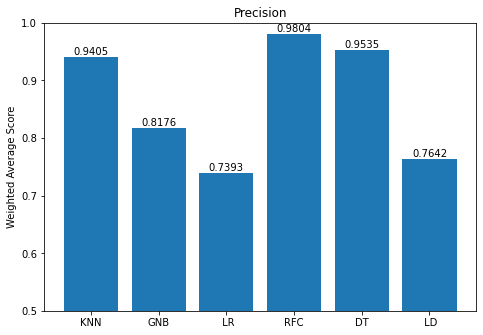

In [143]:
# Precision
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9405 ,0.8176,0.7393,0.9804,0.9535,0.7642]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Precision')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest precision, Logistic Regression gives the lowest.

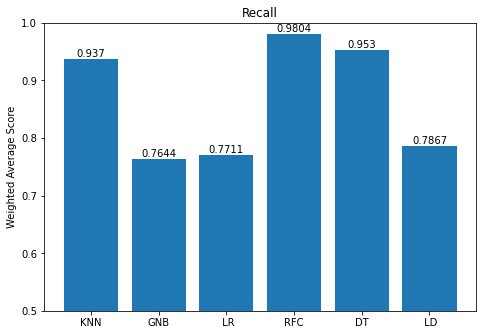

In [144]:
# Recall
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9370,0.7644,0.7711,0.9804,0.9530,0.7867]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Recall')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest recall, Gaussian Naive Bayes gives the lowest.

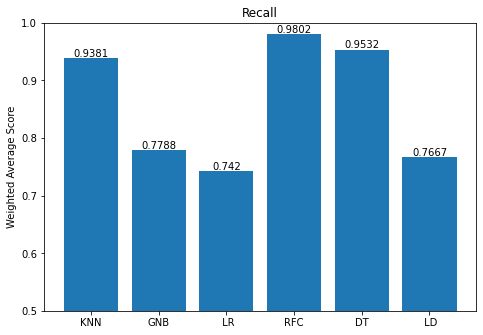

In [145]:
# F1-score
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifications = ['KNN', 'GNB', ' LR', 'RFC', 'DT', ' LD'] 
weight = [0.9381,0.7788,0.7420,0.9802,0.9532,0.7667]
bar_plot = ax.bar(classifications,weight) 
ax.set_ylabel('Weighted Average Score') 
ax.set_title('Recall')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot): 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height, 
                weight[idx], ha='center', va='bottom', rotation=0)

autolabel(bar_plot) 
plt.ylim(0.5,1.0) 
plt.show()

Random Forest gives the highest recall, Logistic Regression gives the lowest.

# Principal Component Analysis
With PCA we can detect which feature is useful for this research

In [81]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
7686,0.67,0.92,4,156,2,0,0,2
8988,0.96,0.93,3,238,2,0,0,1
5850,0.83,0.75,3,150,3,0,0,1
10600,0.63,0.94,4,219,3,0,0,1
6207,0.63,0.98,4,210,3,0,0,2
...,...,...,...,...,...,...,...,...
1395,0.45,0.51,2,156,3,0,0,2
3273,0.49,0.52,5,188,4,0,0,2
4475,0.67,0.52,4,262,2,0,0,2
11969,0.60,0.85,3,242,2,0,0,1


In [82]:
## Train test-split using X (without one-hot encoder of role)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state= 50)

In [83]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

Xtrain_PCA = pca.fit_transform(Xtrain) 
Xtest_PCA = pca.transform(Xtest)

explained_variance = pca.explained_variance_ratio_

In [84]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_pca = KNeighborsClassifier(n_neighbors=10) 
knn_pca.fit(Xtrain_PCA, Ytrain)
y_knn_pca = knn_pca.predict(Xtest_PCA)

print('\n\t\tK-Nearest Neighbors Classifier\n\n', classification_report(Ytest, y_knn_pca, digits=4))


		K-Nearest Neighbors Classifier

               precision    recall  f1-score   support

           0     0.9662    0.9428    0.9544      2063
           1     0.8282    0.8932    0.8595       637

    accuracy                         0.9311      2700
   macro avg     0.8972    0.9180    0.9069      2700
weighted avg     0.9337    0.9311    0.9320      2700



In [85]:
from sklearn.naive_bayes import GaussianNB

gnb_pca = GaussianNB() 
gnb_pca.fit(Xtrain_PCA, Ytrain) 
y_gnb_pca = gnb_pca.predict(Xtest_PCA)

print('\n\t\tGaussian Naive Bayes Classifier\n\n', classification_report(Ytest, y_gnb_pca, digits=4))


		Gaussian Naive Bayes Classifier

               precision    recall  f1-score   support

           0     0.7825    0.9995    0.8778      2063
           1     0.9846    0.1005    0.1823       637

    accuracy                         0.7874      2700
   macro avg     0.8836    0.5500    0.5301      2700
weighted avg     0.8302    0.7874    0.7137      2700



In [86]:
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression() 
lr_pca.fit(Xtrain_PCA, Ytrain) 
y_lr_pca = lr_pca.predict(Xtest_PCA)

print('\n\t\tLogistic Regression\n\n', classification_report(Ytest, y_lr_pca, digits=4))


		Logistic Regression

               precision    recall  f1-score   support

           0     0.7630    0.9942    0.8634      2063
           1     0.0000    0.0000    0.0000       637

    accuracy                         0.7596      2700
   macro avg     0.3815    0.4971    0.4317      2700
weighted avg     0.5830    0.7596    0.6597      2700



In [87]:
#  Randon  Forest
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier(random_state=67) 
rf_pca.fit(Xtrain_PCA, Ytrain)
y_rf_pca = rf_pca.predict(Xtest_PCA)

print('\n\t\tRandom Forest Classifier\n\n', classification_report(Ytest, y_rf_pca, digits=4))



		Random Forest Classifier

               precision    recall  f1-score   support

           0     0.9814    0.9719    0.9766      2063
           1     0.9117    0.9403    0.9258       637

    accuracy                         0.9644      2700
   macro avg     0.9466    0.9561    0.9512      2700
weighted avg     0.9650    0.9644    0.9646      2700



In [88]:
#  Decision  Tree
from sklearn.tree import DecisionTreeClassifier

dt_pca = DecisionTreeClassifier(max_depth=3) 
dt_pca.fit(Xtrain_PCA, Ytrain)
y_dt_pca = dt_pca.predict(Xtest_PCA)

print('\n\t\tDecission tree Classifier\n\n', classification_report(Ytest, y_dt_pca, digits=4))


		Decission tree Classifier

               precision    recall  f1-score   support

           0     0.9358    0.8827    0.9085      2063
           1     0.6790    0.8038    0.7362       637

    accuracy                         0.8641      2700
   macro avg     0.8074    0.8432    0.8223      2700
weighted avg     0.8752    0.8641    0.8678      2700



In [89]:
#  Linear Discriminant  Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pca = LinearDiscriminantAnalysis() 
lda_pca.fit(Xtrain_PCA, Ytrain) 
y_lda_pca = lda_pca.predict(Xtest_PCA)

print('\n\t\tLinear Discriminant Analysis\n\n', classification_report(Ytest, y_lda_pca,digits=4 ))


		Linear Discriminant Analysis

               precision    recall  f1-score   support

           0     0.7620    0.9884    0.8605      2063
           1     0.0000    0.0000    0.0000       637

    accuracy                         0.7552      2700
   macro avg     0.3810    0.4942    0.4303      2700
weighted avg     0.5822    0.7552    0.6575      2700



[0.24382682 0.14348358 0.2374664  0.15537492 0.18101941 0.01713662
 0.00312653 0.01856573]


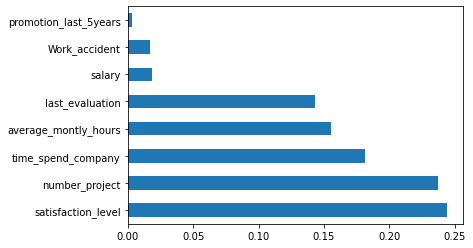

In [98]:
#determine the top 5 model that affect
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt
model = ExtraTreesClassifier() 
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Because the organisation is interested in learning about the common elements or features that influence employee departure, the bar chart above depicts the eight most common aspects or features that influence manufacturing defect discovery. 

Therefore, the top 5 common features that affect manufacturing defect identification are'satisfication level', 'number project', 'time spend company', 'average monthy hours', and 'last evaluation.'

In [99]:
bestData = pd.DataFrame(myNewData[['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours','last_evaluation']])
bestData

,satisfaction_level,number_project,time_spend_company,average_montly_hours,last_evaluation
7686,0.67,4,2,156,0.92
8988,0.96,3,2,238,0.93
5850,0.83,3,3,150,0.75
10600,0.63,4,3,219,0.94
6207,0.63,4,3,210,0.98
...,...,...,...,...,...
1395,0.45,2,3,156,0.51
3273,0.49,5,4,188,0.52
4475,0.67,4,2,262,0.52
11969,0.60,3,2,242,0.85


<AxesSubplot:>

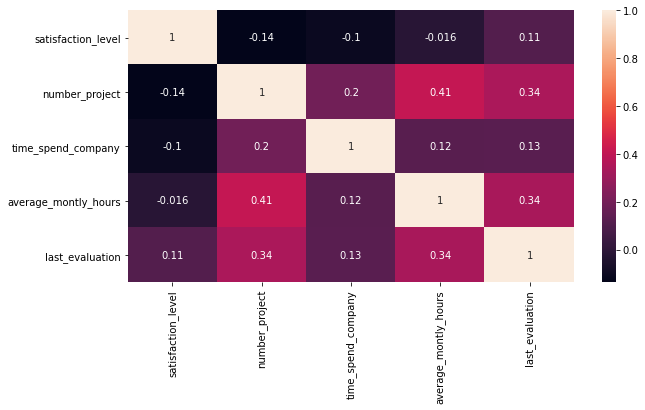

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(bestData.corr(), annot = True)

A correlation heatmap is a graphical representation of a correlation matrix that shows how different variables are related.

## Evaluation

Following thorough data cleaning and training with various models, it has been determined that the Random Forest Classifier is the best model for this data, as it provides the highest accuracy, recall, and precision among the other models.


In [112]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state= 50)

model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)
Report = classification_report(Ytest,model.predict(Xtest))

fill_wif_zero = df_encoded.fillna(0)
## Train test-split using df_encoded which fill with 0
Xtrain, Xtest, Ytrain, Ytest = train_test_split(fill_wif_zero, y, test_size=0.2, random_state= 50)

model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)
HEreport = classification_report(Ytest,model.predict(Xtest))

## Train test-split using X (without one-hot encoder of role)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state= 50)

from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

Xtrain_PCA = pca.fit_transform(Xtrain) 
Xtest_PCA = pca.transform(Xtest)

explained_variance = pca.explained_variance_ratio_

#  Randon  Forest
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier(random_state=67) 
rf_pca.fit(Xtrain_PCA, Ytrain)
y_rf_pca = rf_pca.predict(Xtest_PCA)

PCAreport = classification_report(Ytest, y_rf_pca, digits=2)

print(f" Normal Data (standardized and normalized):\n{Report}\n\nOne-hot encoded data (NaN values replaced by 0):\n{HEreport}\n\nPCA Data:\n{PCAreport}")

 Normal Data (standardized and normalized):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2063
           1       0.99      0.95      0.97       637

    accuracy                           0.99      2700
   macro avg       0.99      0.97      0.98      2700
weighted avg       0.99      0.99      0.99      2700


One-hot encoded data (NaN values replaced by 0):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2063
           1       0.99      0.93      0.96       637

    accuracy                           0.98      2700
   macro avg       0.98      0.96      0.97      2700
weighted avg       0.98      0.98      0.98      2700


PCA Data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2063
           1       0.91      0.94      0.93       637

    accuracy                           0.96      2700
   macro avg       0.95

We can see that the normal data (all features except 'role' and 'names') classfication report gives us the highest accuracy among the others data. By using one-hot encoded (all features except 'names' and 'role' using one-hot encoder), the accuracy is not giving us the improvement same as PCA data. 

LinearDiscriminant, on the other hand, is the worst model to apply on this data. This is because 

- It requires normal distribution assumption on features/predictors
- Sometimes not good for few categories variables.


In [113]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state= 50)

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)
y_lda = lda.predict(Xtest)

print('\n\t\tLinear Discriminant Analysis\n\n', classification_report(Ytest, y_lda,digits=2))


		Linear Discriminant Analysis

               precision    recall  f1-score   support

           0       0.80      0.92      0.86      2063
           1       0.50      0.26      0.34       637

    accuracy                           0.76      2700
   macro avg       0.65      0.59      0.60      2700
weighted avg       0.73      0.76      0.74      2700



## Deployment

When people log on to our system, the predictions will be provided upon request, and they can interact with the prediction model by entering the input raw values of satisfication level', 'number project', 'time spend company', 'average monthy hours', and 'last evaluation'.

The steps for deployment are as follows:


In [123]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
7686,0.67,0.92,4,156,2,0,0,2
8988,0.96,0.93,3,238,2,0,0,1
5850,0.83,0.75,3,150,3,0,0,1
10600,0.63,0.94,4,219,3,0,0,1
6207,0.63,0.98,4,210,3,0,0,2
...,...,...,...,...,...,...,...,...
1395,0.45,0.51,2,156,3,0,0,2
3273,0.49,0.52,5,188,4,0,0,2
4475,0.67,0.52,4,262,2,0,0,2
11969,0.60,0.85,3,242,2,0,0,1


In [124]:
##satisfication level', 'number project', 'time spend company', 'average monthy hours', and 'last evaluation'
X = X.drop(['Work_accident', 'promotion_last_5years', 'salary'],axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
7686,0.67,0.92,4,156,2
8988,0.96,0.93,3,238,2
5850,0.83,0.75,3,150,3
10600,0.63,0.94,4,219,3
6207,0.63,0.98,4,210,3
...,...,...,...,...,...
1395,0.45,0.51,2,156,3
3273,0.49,0.52,5,188,4
4475,0.67,0.52,4,262,2
11969,0.60,0.85,3,242,2


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)



finalModel = RandomForestClassifier(max_features = 2, n_estimators = 190)
finalModel.fit(X_train, y_train)
y_predModel =finalModel.predict(X_test)

print("Accuracy Score:", accuracy_score(y_predModel, y_test))

Accuracy Score: 0.99


With this model, which has a 97 percent accuracy, we do train-test-split

	1. Request five values from the user: Point 1, Point 2, Point 3, Point 4, Point 5.
    
	2. If any of the user input values are null, they will be replaced with 0.
    
    3. Fit the user input to our best model, which is a random forest classifier with 
 	    hyperparameters max_features = 2 and n_estimators = 190.
        
    4. Print the projected outcomes.


In [135]:
def prediction(Point1, Point2, Point3, Point4, Point5):
    #Pre-processing user input where if null, replace with 0
    if(Point1 == ''):
        Point1=0
    if(Point2 == ''):
        Point2=0
    if(Point3 == ''):
        Point3=0
    if(Point4 == ''):
        Point4=0
    if(Point5 == ''):
        Point5=0
        
    prediction = finalModel.predict([[Point1, Point2, Point3, Point4, Point5]])
    if prediction ==1:
        pred = 1
    else:
        pred = 0
    return pred

In [137]:
def main():
    satisfactionLevel = input ("Satisfaction Level:")
    lastEvaluation = input ("Last Evaluation:")
    numberProject = input ("Number Project:")
    averageMontlyHour = input ("Average Montly Hour:")
    timeSpendCompany = input ("Time Spend Company:")
    
    
    
    result = prediction(satisfactionLevel,lastEvaluation, numberProject, averageMontlyHour, timeSpendCompany)
    print('Predicted Class result: ', result)
    return
main()

Satisfaction Level:0.8
Last Evaluation:0.57
Number Project:3
Average Montly Hour:162
Time Spend Company:2
Predicted Class result:  0


## Conclusion

In conclusion, the Random Forest Classifier is the best model to employ on this collection of data.
Even when normal data, one-hot encoded data and PCA data, the Random Forest Classifier produces the best accuracy among the other models, whereas the Linear Discriminant produces the lowest results in every case. It is also obvious that substituting the NaN values with the one-hot encoded role column cannot improves the model's performance.
